In [2]:
pip install -U imbalanced-learn

     |████████████████████████████████| 163kB 5.3MB/s eta 0:00:01
     |████████████████████████████████| 7.1MB 6.7MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE



In [8]:
df = pd.read_csv('Traffic_Violations.csv', low_memory=False)

In [9]:
df.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


In [10]:
df.dtypes

Date Of Stop                object
Time Of Stop                object
Agency                      object
SubAgency                   object
Description                 object
Location                    object
Latitude                   float64
Longitude                  float64
Accident                    object
Belts                       object
Personal Injury             object
Property Damage             object
Fatal                       object
Commercial License          object
HAZMAT                      object
Commercial Vehicle          object
Alcohol                     object
Work Zone                   object
State                       object
VehicleType                 object
Year                       float64
Make                        object
Model                       object
Color                       object
Violation Type              object
Charge                      object
Article                     object
Contributed To Accident     object
Race                

In [11]:
#drop null och dupliceringar
df_clean = df.drop_duplicates().dropna()
df_clean.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type',
       'Geolocation'],
      dtype='object')

In [12]:
to_drop = ['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Work Zone', 'State', 'Year', 'Violation Type', 'Charge', 
        'Article', 'Contributed To Accident', 'Driver City', 'Driver State', 'DL State', 'Arrest Type',
       'Geolocation']

In [13]:
df_clean.drop(to_drop, inplace=True, axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119016 entries, 1 to 1291740
Data columns (total 9 columns):
Belts              1119016 non-null object
Personal Injury    1119016 non-null object
Alcohol            1119016 non-null object
VehicleType        1119016 non-null object
Make               1119016 non-null object
Model              1119016 non-null object
Color              1119016 non-null object
Race               1119016 non-null object
Gender             1119016 non-null object
dtypes: object(9)
memory usage: 85.4+ MB


In [14]:
df_clean.columns = df_clean.columns.str.replace(' ', '_')

In [15]:
df_clean.columns

Index(['Belts', 'Personal_Injury', 'Alcohol', 'VehicleType', 'Make', 'Model',
       'Color', 'Race', 'Gender'],
      dtype='object')

In [16]:
df_clean['VehicleType'].value_counts()

02 - Automobile              987126
05 - Light Duty Truck         62735
28 - Other                    20372
03 - Station Wagon            18556
01 - Motorcycle               10847
06 - Heavy Duty Truck         10134
08 - Recreational Vehicle      3772
19 - Moped                     1231
07 - Truck/Road Tractor        1049
04 - Limousine                  673
20 - Commercial Rig             588
25 - Utility Trailer            564
10 - Transit Bus                409
29 - Unknown                    295
12 - School Bus                 217
27 - Farm Equipment              91
09 - Farm Vehicle                86
26 - Boat Trailer                61
21 - Tandem Trailer              49
11 - Cross Country Bus           46
23 - Travel/Home Trailer         25
22 - Mobile Home                 25
13 - Ambulance(Emerg)            13
18 - Police(Non-Emerg)           11
24 - Camper                      10
14 - Ambulance(Non-Emerg)        10
15 - Fire(Emerg)                  5
17 - Police(Emerg)          

In [17]:
# Car
df_clean['VehicleType'] = np.where(df_clean['VehicleType'] == '02 - Automobile', '1', df_clean['VehicleType'])
df_clean['VehicleType'] = np.where(df_clean['VehicleType'] == '03 - Station Wagon', '1', df_clean['VehicleType'])
df_clean['VehicleType'] = np.where(df_clean['VehicleType'] == '04 - Limousine', '1', df_clean['VehicleType'])

# Trucks
df_clean['VehicleType'] = np.where(df_clean['VehicleType'] 
                                   == '05 - Light Duty Truck', '2', df_clean['VehicleType'])
df_clean['VehicleType'] = np.where(df_clean['VehicleType'] 
                                   == '06 - Heavy Duty Truck', '2', df_clean['VehicleType'])

# Motorcycle
df_clean['VehicleType'] = np.where(df_clean['VehicleType'] == '01 - Motorcycle', '3', df_clean['VehicleType'])
df_clean['VehicleType'] = np.where(df_clean['VehicleType'] == '19 - Moped', '3', df_clean['VehicleType'])

In [18]:
df_clean['VehicleType'].value_counts()

1                            1006355
2                              72869
28 - Other                     20372
3                              12078
08 - Recreational Vehicle       3772
07 - Truck/Road Tractor         1049
20 - Commercial Rig              588
25 - Utility Trailer             564
10 - Transit Bus                 409
29 - Unknown                     295
12 - School Bus                  217
27 - Farm Equipment               91
09 - Farm Vehicle                 86
26 - Boat Trailer                 61
21 - Tandem Trailer               49
11 - Cross Country Bus            46
22 - Mobile Home                  25
23 - Travel/Home Trailer          25
13 - Ambulance(Emerg)             13
18 - Police(Non-Emerg)            11
24 - Camper                       10
14 - Ambulance(Non-Emerg)         10
15 - Fire(Emerg)                   5
17 - Police(Emerg)                 4
16 - Fire(Non-Emerg)               4
18 - Police Vehicle                4
15 - Fire Vehicle                  3
1

In [19]:
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='28 - Other'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='29 - Unknown'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='14 - Ambulance(Non-Emerg)'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='18 - Police(Non-Emerg)'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='15 - Fire(Emerg)'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='17 - Police(Emerg)'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='18 - Police Vehicle'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='16 - Fire(Non-Emerg)'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='15 - Fire Vehicle'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='13 - Ambulance'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='08 - Recreational Vehicle'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='25 - Utility Trailer'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='07 - Truck/Road Tractor'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='20 - Commercial Rig'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='10 - Transit Bus '].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='12 - School Bus'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='27 - Farm Equipment'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='09 - Farm Vehicle'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='26 - Boat Trailer'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='21 - Tandem Trailer'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='11 - Cross Country Bus'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='23 - Travel/Home Trailer'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='22 - Mobile Home'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='13 - Ambulance(Emerg)'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='24 - Camper'].index, inplace=True)
df_clean.drop(df_clean.loc[df_clean['VehicleType']=='10 - Transit Bus'].index, inplace=True)

In [20]:
df_clean['VehicleType'].value_counts()

1    1006355
2      72869
3      12078
Name: VehicleType, dtype: int64

In [21]:
df_clean.head()

,Belts,Personal_Injury,Alcohol,VehicleType,Make,Model,Color,Race,Gender
1,No,No,No,1,TOYOTA,COROLLA,GREEN,WHITE,F
2,No,No,No,1,HONDA,ACCORD,SILVER,BLACK,F
3,No,No,No,1,DODG,DAKOTA,WHITE,BLACK,M
6,No,No,No,1,FORD,PICKUP,BLACK,HISPANIC,M
10,No,No,No,1,CADI,STS,BLACK,WHITE,M


In [22]:
df_clean.dtypes

Belts              object
Personal_Injury    object
Alcohol            object
VehicleType        object
Make               object
Model              object
Color              object
Race               object
Gender             object
dtype: object

In [23]:
 df_clean.astype({'VehicleType': 'float'}).dtypes

Belts               object
Personal_Injury     object
Alcohol             object
VehicleType        float64
Make                object
Model               object
Color               object
Race                object
Gender              object
dtype: object

In [24]:
df_clean.columns

Index(['Belts', 'Personal_Injury', 'Alcohol', 'VehicleType', 'Make', 'Model',
       'Color', 'Race', 'Gender'],
      dtype='object')

In [25]:
to_drop = ['Color', 'Race', 'Gender']

df_clean.drop(to_drop, inplace=True, axis=1)

In [26]:
df_clean.head()

,Belts,Personal_Injury,Alcohol,VehicleType,Make,Model
1,No,No,No,1,TOYOTA,COROLLA
2,No,No,No,1,HONDA,ACCORD
3,No,No,No,1,DODG,DAKOTA
6,No,No,No,1,FORD,PICKUP
10,No,No,No,1,CADI,STS


In [27]:
pd.Series(df_clean['Make'].unique())

0           TOYOTA
1            HONDA
2             DODG
3             FORD
4             CADI
           ...    
2951           ISZ
2952      MERCURAY
2953         DODKE
2954    MISSUBISHI
2955         VOLK.
Length: 2956, dtype: object

In [28]:
pd.Series(df_clean['Model'].unique())

0        COROLLA
1         ACCORD
2         DAKOTA
3         PICKUP
4            STS
          ...   
15438      SONCI
15439         MZ
15440      J30LT
15441        35M
15442     CIICIC
Length: 15443, dtype: object

In [29]:
df_clean.drop(['Model','Make'], inplace=True, axis=1)

In [30]:
df_clean.head()

,Belts,Personal_Injury,Alcohol,VehicleType
1,No,No,No,1
2,No,No,No,1
3,No,No,No,1
6,No,No,No,1
10,No,No,No,1


In [31]:
pd.Series(df_clean['Personal_Injury'].unique())

0     No
1    Yes
dtype: object

In [32]:
for column in df_clean.filter(['Belts','Personal_Injury','Alcohol']).columns: df_clean[column] = df_clean[column].replace(['Yes', 'No'], [1, 0]).astype('uint8')

In [33]:
xcolumns = ['VehicleType', 'Belts', 'Alcohol']
X = df_clean[xcolumns]
y = df_clean.Personal_Injury

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print("Our training data has {} rows".format(len(X_train)))
print("Our test data has {} rows".format(len(X_test)))

Our training data has 818476 rows
Our test data has 272826 rows


In [34]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred=logreg.predict(X_test)

In [36]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[269732,      0],
       [  3094,      0]])

Text(0.5, 257.44, 'Predicted label')

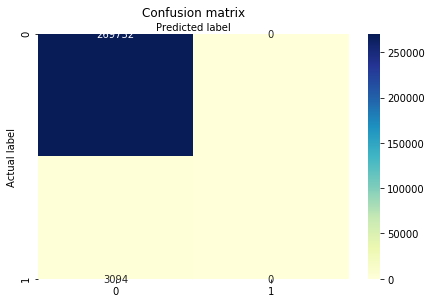

In [37]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Our training data has {} rows".format(len(X_train)))
print("Our test data has {} rows".format(len(X_test)))

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9886594386165541
Precision: 0.0
Recall: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
